In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

In [171]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
!pip install scikit-learn

In [172]:
from xgboost import XGBRegressor

In [173]:
def read_csv(file_path):
    return pd.read_csv(file_path)

In [174]:
c = read_csv('calories.csv')
e = read_csv('exercise.csv')

In [175]:
c.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [176]:
e.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [177]:
data = pd.merge(c, e, on='User_ID')

In [178]:
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [179]:
data.shape

(15000, 9)

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [181]:
data.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [182]:
data.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [183]:
data.duplicated().any()

False

In [184]:
def plot_graph(data):
    numerical_columns = data.select_dtypes(include=np.number).columns
     
    for column in numerical_columns:
        plt.figure(figsize=(5,3))
        sns.distplot(data[column],kde=True)
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
        
    categorical_columns = data.select_dtypes(include='object').columns
    for column in categorical_columns:
        plt.figure(figsize=(5, 3))
        sns.countplot(data[column])
        plt.title(f'Countplot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

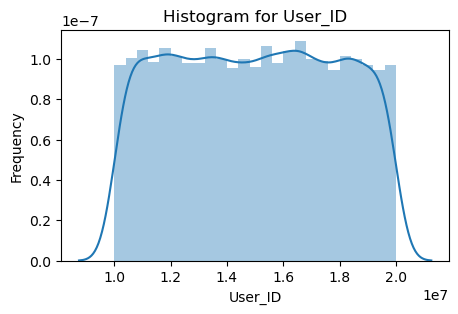

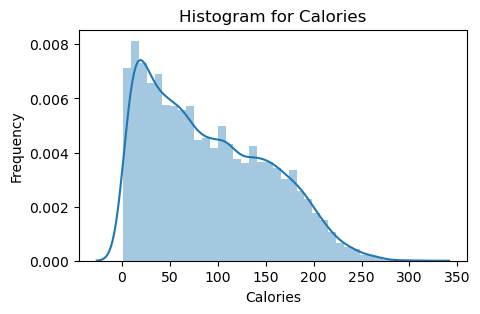

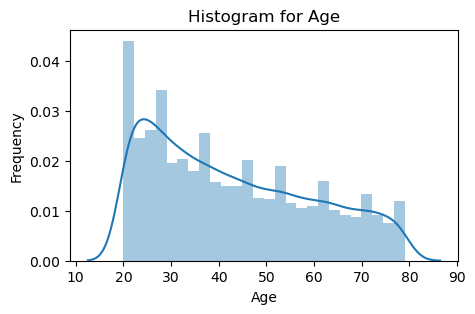

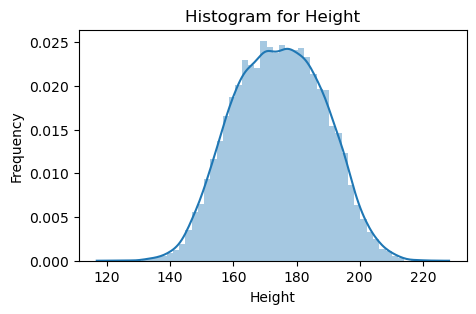

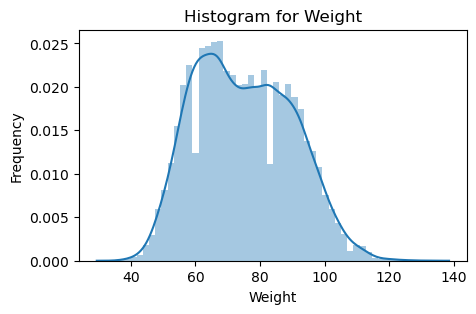

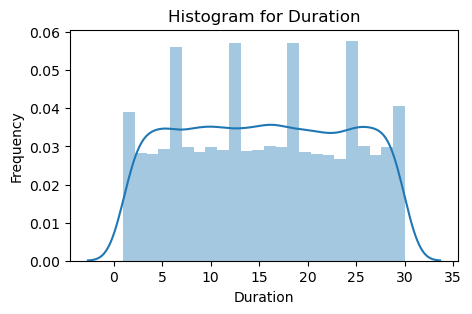

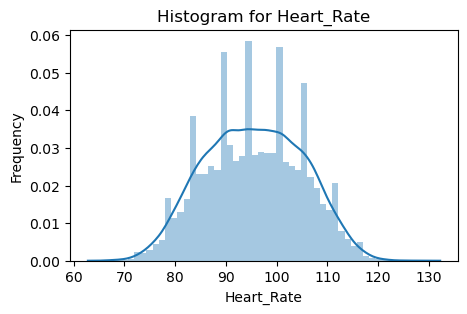

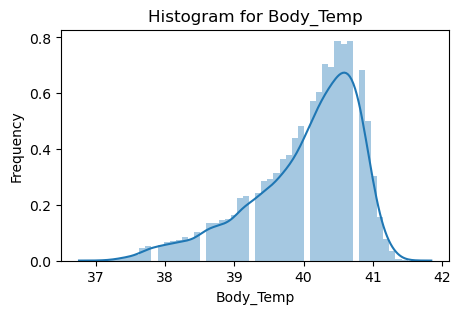

ValueError: could not convert string to float: 'male'

<Figure size 500x300 with 0 Axes>

In [185]:
plot_graph(data)

In [ ]:
def seperate_features_target(data,target_column):
    X = data.drop(columns=[target_column],axis=1)
    y = data[target_column]
    
    return X,y

In [ ]:
data.columns

In [ ]:
X,y = seperate_features_target(data,'Calories')

In [188]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


In [189]:
X = X.drop(columns=['User_ID'])

KeyError: "['User_ID'] not found in axis"

In [190]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
y.head()

In [191]:
def perform_train_test_split(X, y, test_size=0.20, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [192]:
X_train,X_test,y_train,y_test = perform_train_test_split(X, y, test_size=0.20, random_state=42)

In [193]:
X_train.shape

(12000, 7)

In [194]:
X_test.shape

(3000, 7)

In [195]:
preprocessor = ColumnTransformer(transformers=[
    ('cat',OrdinalEncoder(),['Gender']),
    ('num',StandardScaler(),['Age','Height','Weight','Duration','Heart_Rate','Body_Temp'])
],remainder='passthrough')

In [196]:
pipeline = Pipeline([("preprocessor",preprocessor),
                     ("model",LinearRegression())])

In [197]:
from sklearn import set_config

In [198]:
set_config(display='diagram')

In [199]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [200]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', LinearRegression())])

In [201]:
y_pred = pipeline.predict(X_test)

In [202]:
r2_score(y_test,y_pred)

0.9672937151257295

In [203]:
from sklearn.metrics import mean_absolute_error

In [204]:
mean_absolute_error(y_test,y_pred)

8.441513553849703

In [205]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [206]:
cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')

In [207]:
cv_results.mean()

0.9671402283675841

In [208]:
def model_scorer(model_name,model):
    
    output=[]
   
    
    output.append(model_name)
    
    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    output.append(r2_score(y_test,y_pred))
    output.append(mean_absolute_error(y_test,y_pred))
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
    output.append(cv_results.mean())
    
    return output

In [214]:
model_dict={
    'log':LinearRegression(),
    'RF':RandomForestRegressor(),
    'XGBR':XGBRegressor(),
}

In [215]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [217]:
model_output

[['log', 0.9672937151257295, 8.441513553849703, 0.9671402283675841],
 ['RF', 0.998241921366226, 1.7047500000000002, 0.9979246212778088],
 ['XGBR', 0.9988678909361673, 1.4981198125282924, 0.9988510864545181]]

In [218]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',XGBRegressor())])

In [219]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, dev...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [220]:
sample = pd.DataFrame({
   'Gender':'male',
    'Age':68,
    'Height':190.0,
    'Weight':94.0,
    'Duration':29.0,
    'Heart_Rate':105.0,
    'Body_Temp':40.8,
},index=[0])

In [221]:
pipeline.predict(sample)

array([231.0721], dtype=float32)

In [222]:
import pickle

In [223]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [224]:
with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [225]:
result = pipeline_saved.predict(sample)

In [226]:
result 

array([231.0721], dtype=float32)

In [228]:
#GUI

import pickle
import pandas as pd
from tkinter import *

def show_entry():
    
    with open('pipeline.pkl','rb') as f:
        pipeline = pickle.load(f)

    p1 = str(clicked.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())

    sample = pd.DataFrame({
    'Gender':[p1],
    'Age':[p2],
    'Height':[p3],
    'Weight':[p4],
    'Duration':[p5],
    'Heart_Rate':[p6],
    'Body_Temp':[p7],
},index=[0])

    result = pipeline.predict(sample)
    print(result)
    Label(master, text="Amount of Calories Burnt").grid(row=13)
    Label(master, text=result[0]).grid(row=14)
        
    
master =Tk()
master.title("Calories Burnt Prediction using Machine Learning")
label = Label(master,text = "Calories Burnt Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Select Gender").grid(row=1)
Label(master,text = "Enter Your Age").grid(row=2)
Label(master,text = "Enter Your Height").grid(row=3)
Label(master,text = "Enter Your Weight").grid(row=4)
Label(master,text = "Duration").grid(row=5)
Label(master,text = "Heart Rate").grid(row=6)
Label(master,text = "Body Temp").grid(row=7)

clicked = StringVar()
options = ['male', 'female']

e1 = OptionMenu(master , clicked , *options )
e1.configure(width=15)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)



Button(master,text="Predict",command=show_entry).grid()

mainloop()